![header](../figures/logos_partenaires._cmems_se.jpg)

# Evaluate CER method on Nadir tracks

<div style="text-align: right"><i> 2023-01-19 evaluation_onnadirs_CERmethod </i></div>

***
**Authors:**  Datlas, IGE, IMT-Atlantique & CLS <br>
**Copyright:** 2022 Datlas, IGE, IMT-Atlantique & CLS <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h1><center>Evaluate CER method calibration on Nadir tracks </center></h1></div>

In [1]:
import os
import glob
import sys
import numpy as np
sys.path.append('..')
from src.swot import * 
from src.eval_on_nadirtrack import * 
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-info" role="alert">

<h2>1. Downloading the Nadir satellite data for evaluations </h2>

</div>

In [2]:
mkdir -p ../inputs/dc_SWOTcalibGS_nadirs/

In [3]:
# Check if inputs have already been downloaded otherwise do
if len(os.listdir('../inputs/dc_SWOTcalibGS_inputs/'))<2:
    # Get pseuso-observation
    print('Downloading and unzipping inputs')
    !wget https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/fileServer/meomopendap/extract/ocean-data-challenges/2022c_SWOT_error_calibration_GS/dc_SWOTcalibGS_inputs.tar.gz
    !tar -xvf dc_SWOTcalibGS_inputs.tar.gz dc_SWOTcalibGS_inputs    
    !mv dc_SWOTcalibGS_inputs  ../inputs/    
    !rm dc_SWOTcalibGS_inputs.tar.gz 

# Check if nadir satellite data have already been downloaded otherwise do
if len(os.listdir('../inputs/dc_SWOTcalibGS_nadirs/'))<2:
    # Get pseuso-observation
    print('Downloading and unzipping inputs')
    !wget https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/fileServer/meomopendap/extract/ocean-data-challenges/2022c_SWOT_error_calibration_GS/dc_SWOTcalibGS_nadirs.tar.gz
    !tar -xvf dc_SWOTcalibGS_nadirs.tar.gz dc_SWOTcalibGS_nadirs    
    !mv dc_SWOTcalibGS_nadirs  ../inputs/    
    !rm dc_SWOTcalibGS_nadirs.tar.gz 

In [4]:
sats = ['../inputs/dc_SWOTcalibGS_nadirs/dc_SWOTcalibGS_jason1.nc',
        '../inputs/dc_SWOTcalibGS_nadirs/dc_SWOTcalibGS_envisat.nc',
        '../inputs/dc_SWOTcalibGS_nadirs/dc_SWOTcalibGS_geosat2.nc',
        '../inputs/dc_SWOTcalibGS_nadirs/dc_SWOTcalibGS_topexposeidon.nc'
       ]


<div class="alert alert-info" role="alert">

<h2>2. Interpolating SWOT input data and SWOT calibrated date </h2>

</div>

## Interpolating input data

In [5]:
dir_of_swottracks = '../inputs/dc_SWOTcalibGS_inputs/'
swottracks_name = 'inputs' 
nremoval = 2
  
lonalong, latalong, timealong, refalong, x_acalong, sshalong_true, sshalong_err = interp_swot2nadir(sats, dir_of_swottracks, swottracks_name, nremoval,ref_nadir='model')


## Interpolating calibration

In [ ]:
list_of_file = sorted(glob.glob('../results/calib_CalCNNmethod/pass*.nc'))
list_of_file_inputs = sorted(glob.glob('../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass*.nc')) 
for f, i in zip(list_of_file, list_of_file_inputs):
    ids = xr.open_dataset(i)
    fds = xr.open_dataset(f)
    p = Path(f)
    new_fds = fds.assign(lon=(('time', 'nC'), ids.lon.values), lat=(('time', 'nC'), ids.lat.values), x_ac=(('time', 'nC'), ids.x_ac.values))
    new_fds.to_netcdf(p.parent / ('dc_' + p.name))

In [11]:
fds

<xarray.Dataset>
Dimensions:                  (time: 553, nC: 61)
Coordinates:
  * time                     (time) datetime64[ns] 2012-11-28T05:43:02.757444...
  * nC                       (nC) int64 -60 -58 -56 -54 -52 ... 52 54 56 58 60
Data variables: (12/16)
    lat                      (time, nC) float32 ...
    lat_nadir                (time) float32 ...
    lon                      (time, nC) float32 ...
    lon_nadir                (time) float32 ...
    ssh_true                 (time, nC) float32 ...
    ssh_obs                  (time, nC) float32 ...
    ...                       ...
    gt                       (time, nC) float64 ...
    oi                       (time, nC) float64 ...
    obs_inp                  (time, nC) float64 ...
    pred                     (time, nC) float64 ...
    ssh_err_calib            (time, nC) float64 ...
    contiguous_chunk         (time) float64 ...
Attributes: (12/26)
    Conventions:               CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    corresponding_grid:        /data/MSA_ETU/mballarotta/ETUDE_BOOST-SWOT/out...
    creator_email:             lucile.gaultier@gmail.com
    creator_name:              Lucile Gaultier and Clement Ubelmann
    date_created:              2018-11-27T12:56:51Z
    ...                        ...
    references:                Gaultier, L., C. Ubelmann, and L.-L. Fu, 2016:...
    standard_name_vocabulary:  CF-1.6
    summary:                   SWOT grid data produced
    time_coverage_end:         0.03536939882970834
    time_coverage_start:       0.00035300925925696447
    title:                     SWOT-like data simulated by SWOT simulator

In [8]:
sorted(glob.glob(f'{dir_of_swottracks}/dc_*.nc'))

['../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass02.nc',
 '../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass03.nc',
 '../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass04.nc',
 '../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass05.nc',
 '../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass06.nc',
 '../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass07.nc',
 '../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass12.nc',
 '../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass13.nc',
 '../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass14.nc',
 '../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass15.nc',
 '../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass16.nc',
 '../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass17.nc',
 '../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass22.nc',
 '../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass23.nc',
 '../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass24.

In [ ]:
dir_of_swottracks = '../results/calib_CalCNNmethod' 
swottracks_name = 'ssh_err_calib' 

# WARNING: Calibrated SWOT data files must start with dc_*

_,_,_,_,_,sshalong_calib = interp_swot2nadir(sats, dir_of_swottracks, swottracks_name, nremoval, ref_nadir='model')


<div class="alert alert-info" role="alert">

<h2>4. Compute diagnostics along nadir tracks </h2>

</div>

In [15]:
calib_name = 'CalCNNmethod'
etuvar = 'sshalong_calib'

file_calib = '../results/calib_CalCNNmethod/calib_onnadirtracks.nc'
file_inputs = '../inputs/dc_SWOTcalibGS_inputs/ref_onnadirtracks.nc'

output_dir = '../results/calib_'+calib_name+'/'
stat_output_filename = f'{output_dir}/stat_onnadirs_'+calib_name+'.nc'
psd_output_filename = f'{output_dir}/psd_onnadirs_'+calib_name+'.nc'

calib_bench_onnadirs = Benchmark_onNadirs() 

## 4.1 - Plotting point-wise error on the nadir tracks

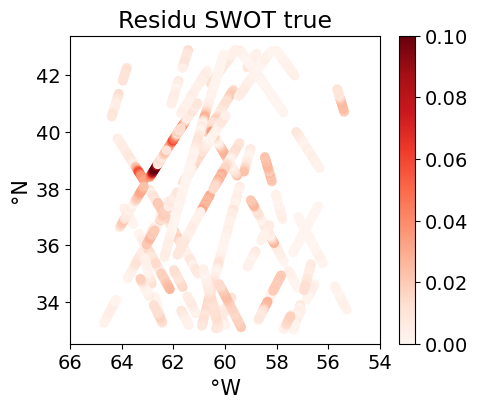

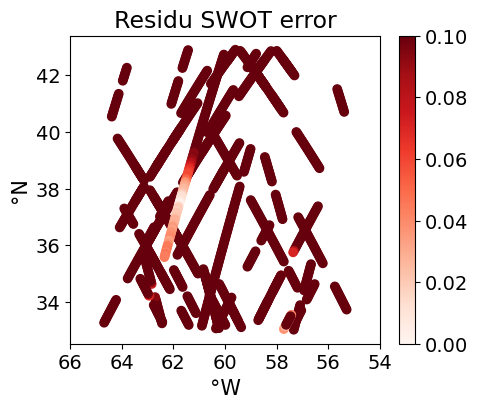

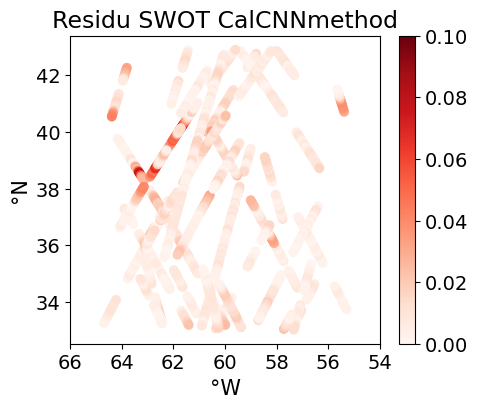

---------------------------------
Global RMSE
RMSE True SWOT: 0.012959922162290178
RMSE Err SWOT: 4.041269790275009
RMSE CalCNNmethod SWOT: 0.01340067792280889


In [16]:
calib_bench_onnadirs.compute_stats(file_calib,etuvar,file_inputs)
calib_bench_onnadirs.write_stats(stat_output_filename, calib=calib_name)
calib_bench_onnadirs.display_stats(stat_output_filename, calib=calib_name)

## 4.2 - Plotting point-wise error across tracks

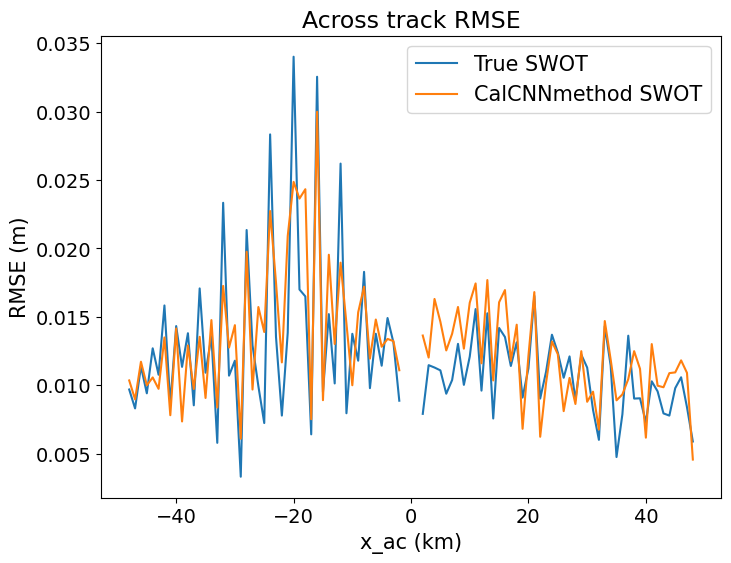

In [17]:
calib_bench_onnadirs.display_stats_acrosstrack(stat_output_filename, calib=calib_name)

## 4.3 - Plotting power spectrum density and noise-to-signal ratio 

Number of available segments of lengh_scale 100 km: 15


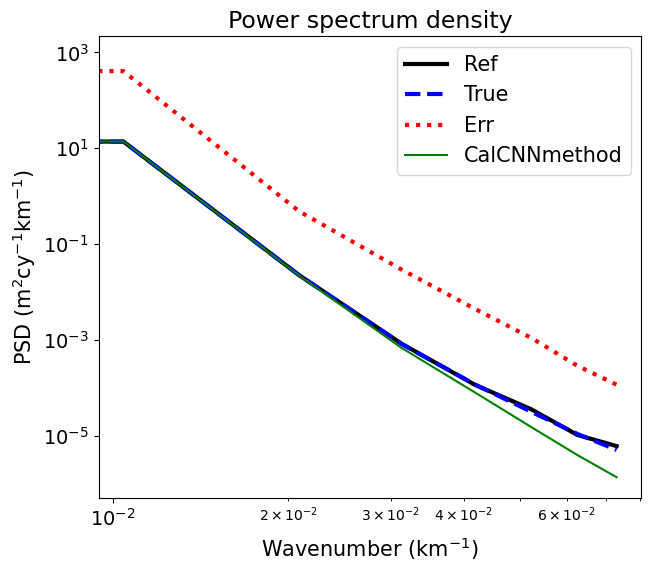

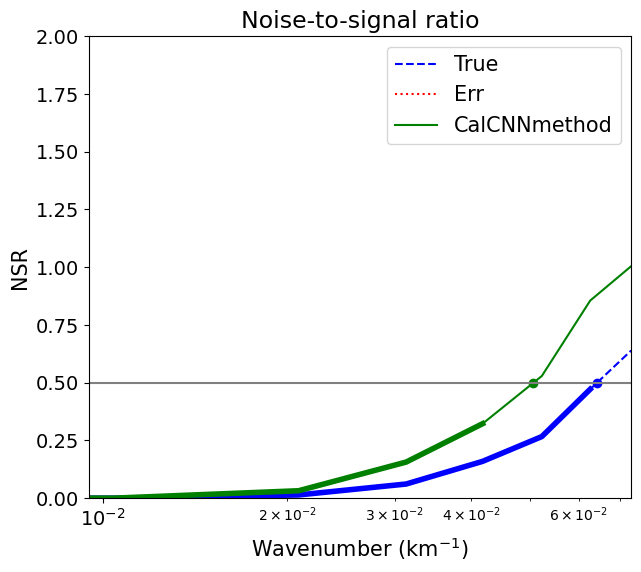

---------------------------------
Global SNR intervals
SNR=0.5 SWOT true: [ 15.560723147702479 , inf ] km
SNR=0.5 SWOT error: nan km
SNR=0.5 SWOT CalCNNmethod: [ 19.771880256316674 , inf ] km


In [18]:
import importlib
import src.eval_on_nadirtrack
importlib.reload(src.eval_on_nadirtrack)

calib_bench_onnadirs = src.eval_on_nadirtrack.Benchmark_onNadirs() 
calib_bench_onnadirs.compute_psd(file_calib,etuvar,file_inputs)
calib_bench_onnadirs.write_psd(psd_output_filename, calib=calib_name)
calib_bench_onnadirs.display_psd(psd_output_filename, calib=calib_name)
